In [28]:
import pandas as pd
import numpy as np
import pickle
import warnings
warnings.filterwarnings('ignore')

In [29]:
d=pd.read_csv(r"E:\xlsx\Titanic Dataset.csv")

In [30]:
d

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [31]:
d.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
data=d.drop(['PassengerId','SibSp','Parch','Ticket','Cabin','Name'],axis=1)

In [33]:
data['Sex']=data['Sex'].map({'male':1,'female':0})

In [34]:
data1=pd.get_dummies(data,dtype=int)

In [35]:
data1

,Survived,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,7.2500,0,0,1
1,1,1,0,38.0,71.2833,1,0,0
2,1,3,0,26.0,7.9250,0,0,1
3,1,1,0,35.0,53.1000,0,0,1
4,0,3,1,35.0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,0,0,1
887,1,1,0,19.0,30.0000,0,0,1
888,0,3,0,NaN,23.4500,0,0,1
889,1,1,1,26.0,30.0000,1,0,0


In [36]:
data1['Age']=data1['Age'].mask(data1['Age']>65,60)

In [37]:
colnames=list(data1)
colnames

['Survived',
 'Pclass',
 'Sex',
 'Age',
 'Fare',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [38]:
from sklearn.impute import KNNImputer 
imputer=KNNImputer(n_neighbors=3)


In [39]:
data_filled=imputer.fit_transform(data1)

In [40]:
data1=pd.DataFrame(data=data_filled,columns=colnames)

In [41]:
data1.head(50)

,Survived,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3.0,1.0,22.000000,7.2500,0.0,0.0,1.0
1,1.0,1.0,0.0,38.000000,71.2833,1.0,0.0,0.0
2,1.0,3.0,0.0,26.000000,7.9250,0.0,0.0,1.0
3,1.0,1.0,0.0,35.000000,53.1000,0.0,0.0,1.0
4,0.0,3.0,1.0,35.000000,8.0500,0.0,0.0,1.0
5,0.0,3.0,1.0,55.166667,8.4583,0.0,1.0,0.0
6,0.0,1.0,1.0,54.000000,51.8625,0.0,0.0,1.0
7,0.0,3.0,1.0,2.000000,21.0750,0.0,0.0,1.0
8,1.0,3.0,0.0,27.000000,11.1333,0.0,0.0,1.0
9,1.0,2.0,0.0,14.000000,30.0708,1.0,0.0,0.0


In [42]:
data1['Age'].unique()

array([22.        , 38.        , 26.        , 35.        , 55.16666667,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 35.66666667,
       31.        , 16.66666667, 34.        , 15.        , 28.        ,
        8.        , 38.5       , 19.        , 40.        , 26.97333333,
       18.        , 60.        , 42.        , 23.66666667, 21.        ,
       32.16666667,  3.        , 25.33333333, 36.        , 18.66666667,
        7.        , 49.        , 29.        , 65.        , 43.        ,
       28.5       ,  5.        , 11.        , 45.        , 33.        ,
       17.        , 32.        , 16.        , 25.        ,  0.83      ,
       30.        , 23.        , 24.        , 46.        , 59.        ,
       37.        , 24.33333333, 22.66666667, 47.        , 14.5       ,
       32.5       , 12.        , 14.66666667,  9.        , 36.5       ,
       51.        , 55.5       , 40.5       , 34.33333333, 28.33

<Axes: ylabel='Age'>

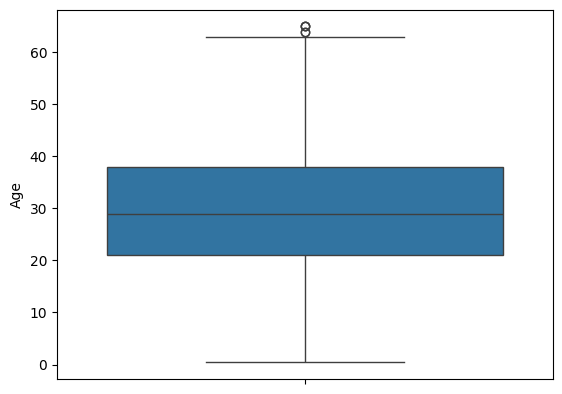

In [43]:
import seaborn as sb
import matplotlib.pyplot as plt
sb.boxplot(data1.Age)

(array([ 47.,  24., 118., 196., 159., 155.,  72.,  54.,  37.,  29.]),
 array([ 0.42 ,  6.878, 13.336, 19.794, 26.252, 32.71 , 39.168, 45.626,
        52.084, 58.542, 65.   ]),
 <BarContainer object of 10 artists>)

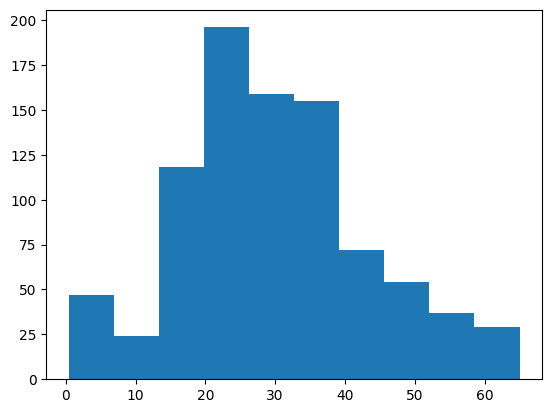

In [44]:
import matplotlib.pyplot as plt
plt.hist(data1['Age'])

In [45]:
cor_mat=data1.corr()
cor_mat

,Survived,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.338481,-0.543351,-0.109370,0.257307,0.168240,0.003650,-0.155660
Pclass,-0.338481,1.000000,0.131900,-0.359539,-0.549500,-0.243292,0.221009,0.081720
Sex,-0.543351,0.131900,1.000000,0.132870,-0.182333,-0.082853,-0.074115,0.125722
Age,-0.109370,-0.359539,0.132870,1.000000,0.095431,0.013323,0.013657,-0.027604
Fare,0.257307,-0.549500,-0.182333,0.095431,1.000000,0.269335,-0.117216,-0.166603
Embarked_C,0.168240,-0.243292,-0.082853,0.013323,0.269335,1.000000,-0.148258,-0.778359
Embarked_Q,0.003650,0.221009,-0.074115,0.013657,-0.117216,-0.148258,1.000000,-0.496624
Embarked_S,-0.155660,0.081720,0.125722,-0.027604,-0.166603,-0.778359,-0.496624,1.000000


<Axes: >

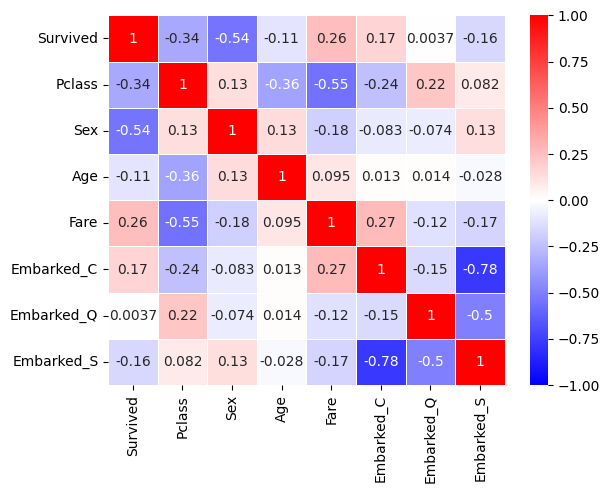

In [46]:
import seaborn as sb
sb.heatmap(cor_mat,vmax=1,vmin=-1,annot=True,linewidth=.5,cmap="bwr")

In [47]:
y=data1['Survived']
x=data1.drop(['Survived'],axis=1)

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [49]:
from sklearn.linear_model import LogisticRegression
Classifier=LogisticRegression()
Classifier.fit(x_train,y_train)

LogisticRegression()

In [50]:
ypred=Classifier.predict(x_test)
ypred

array([0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 1.

In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,ypred)

array([[154,  21],
       [ 32,  88]], dtype=int64)

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypred)

0.8203389830508474